In [1]:
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import LSTM,Dense,Dropout,Softmax
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
import multiprocessing
import xgboost as xgb
from joblib import parallel_backend
from datetime import datetime
import scipy

In [2]:
start=datetime.now()
print(start)
cores=multiprocessing.cpu_count()
tf.config.threading.set_inter_op_parallelism_threads(cores)
tf.config.threading.set_intra_op_parallelism_threads(cores)
cores

2023-11-24 01:59:52.124821


8

In [3]:
df=pd.read_csv('./Obfuscated-MalMem2022.csv')
df

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware


In [4]:
df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [5]:
df=df.drop(columns=[df.columns[0]],axis=1)

In [6]:
df.isna().count()

pslist.nproc                              58596
pslist.nppid                              58596
pslist.avg_threads                        58596
pslist.nprocs64bit                        58596
pslist.avg_handlers                       58596
dlllist.ndlls                             58596
dlllist.avg_dlls_per_proc                 58596
handles.nhandles                          58596
handles.avg_handles_per_proc              58596
handles.nport                             58596
handles.nfile                             58596
handles.nevent                            58596
handles.ndesktop                          58596
handles.nkey                              58596
handles.nthread                           58596
handles.ndirectory                        58596
handles.nsemaphore                        58596
handles.ntimer                            58596
handles.nsection                          58596
handles.nmutant                           58596
ldrmodules.not_in_load                  

In [7]:
df.dtypes=='object'

pslist.nproc                              False
pslist.nppid                              False
pslist.avg_threads                        False
pslist.nprocs64bit                        False
pslist.avg_handlers                       False
dlllist.ndlls                             False
dlllist.avg_dlls_per_proc                 False
handles.nhandles                          False
handles.avg_handles_per_proc              False
handles.nport                             False
handles.nfile                             False
handles.nevent                            False
handles.ndesktop                          False
handles.nkey                              False
handles.nthread                           False
handles.ndirectory                        False
handles.nsemaphore                        False
handles.ntimer                            False
handles.nsection                          False
handles.nmutant                           False
ldrmodules.not_in_load                  

In [8]:
df['Class'].value_counts()[:].index

Index(['Benign', 'Malware'], dtype='object')

In [9]:
df['Class'].value_counts()

Benign     29298
Malware    29298
Name: Class, dtype: int64

sampler


In [10]:
# _,dx=train_test_split(df,random_state=170,test_size=0.2,stratify=df['Class'])
# dx=pd.DataFrame(dx,columns=df.columns)
# _=0

In [11]:
dx=df.copy(deep=True)

In [12]:
dx.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [13]:
temp=[]
catenc=dict()
for i in range(dx.columns.size):
    if(dx.dtypes[i]=='object'):
        temp.append(i)
for i in temp:
    enc=tf.keras.layers.StringLookup(output_mode='int')
    enc.adapt(dx[dx.columns[i]])
    dx[dx.columns[i]]=enc(dx[dx.columns[i]]).numpy()
    catenc[i]=enc

In [14]:
catenc

{55: <keras.src.layers.preprocessing.string_lookup.StringLookup at 0x1a156c69330>}

In [15]:
catenc[temp[0]].get_vocabulary()

['[UNK]', 'Malware', 'Benign']

In [16]:
temp

[55]

In [17]:
dx

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,2
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,2
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,2
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,2
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,221,26,24,116,0,120,86,0,8,1
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,221,26,24,116,0,116,88,0,8,1
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,221,26,24,116,0,120,88,0,8,1
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,221,26,24,116,0,120,87,0,8,1


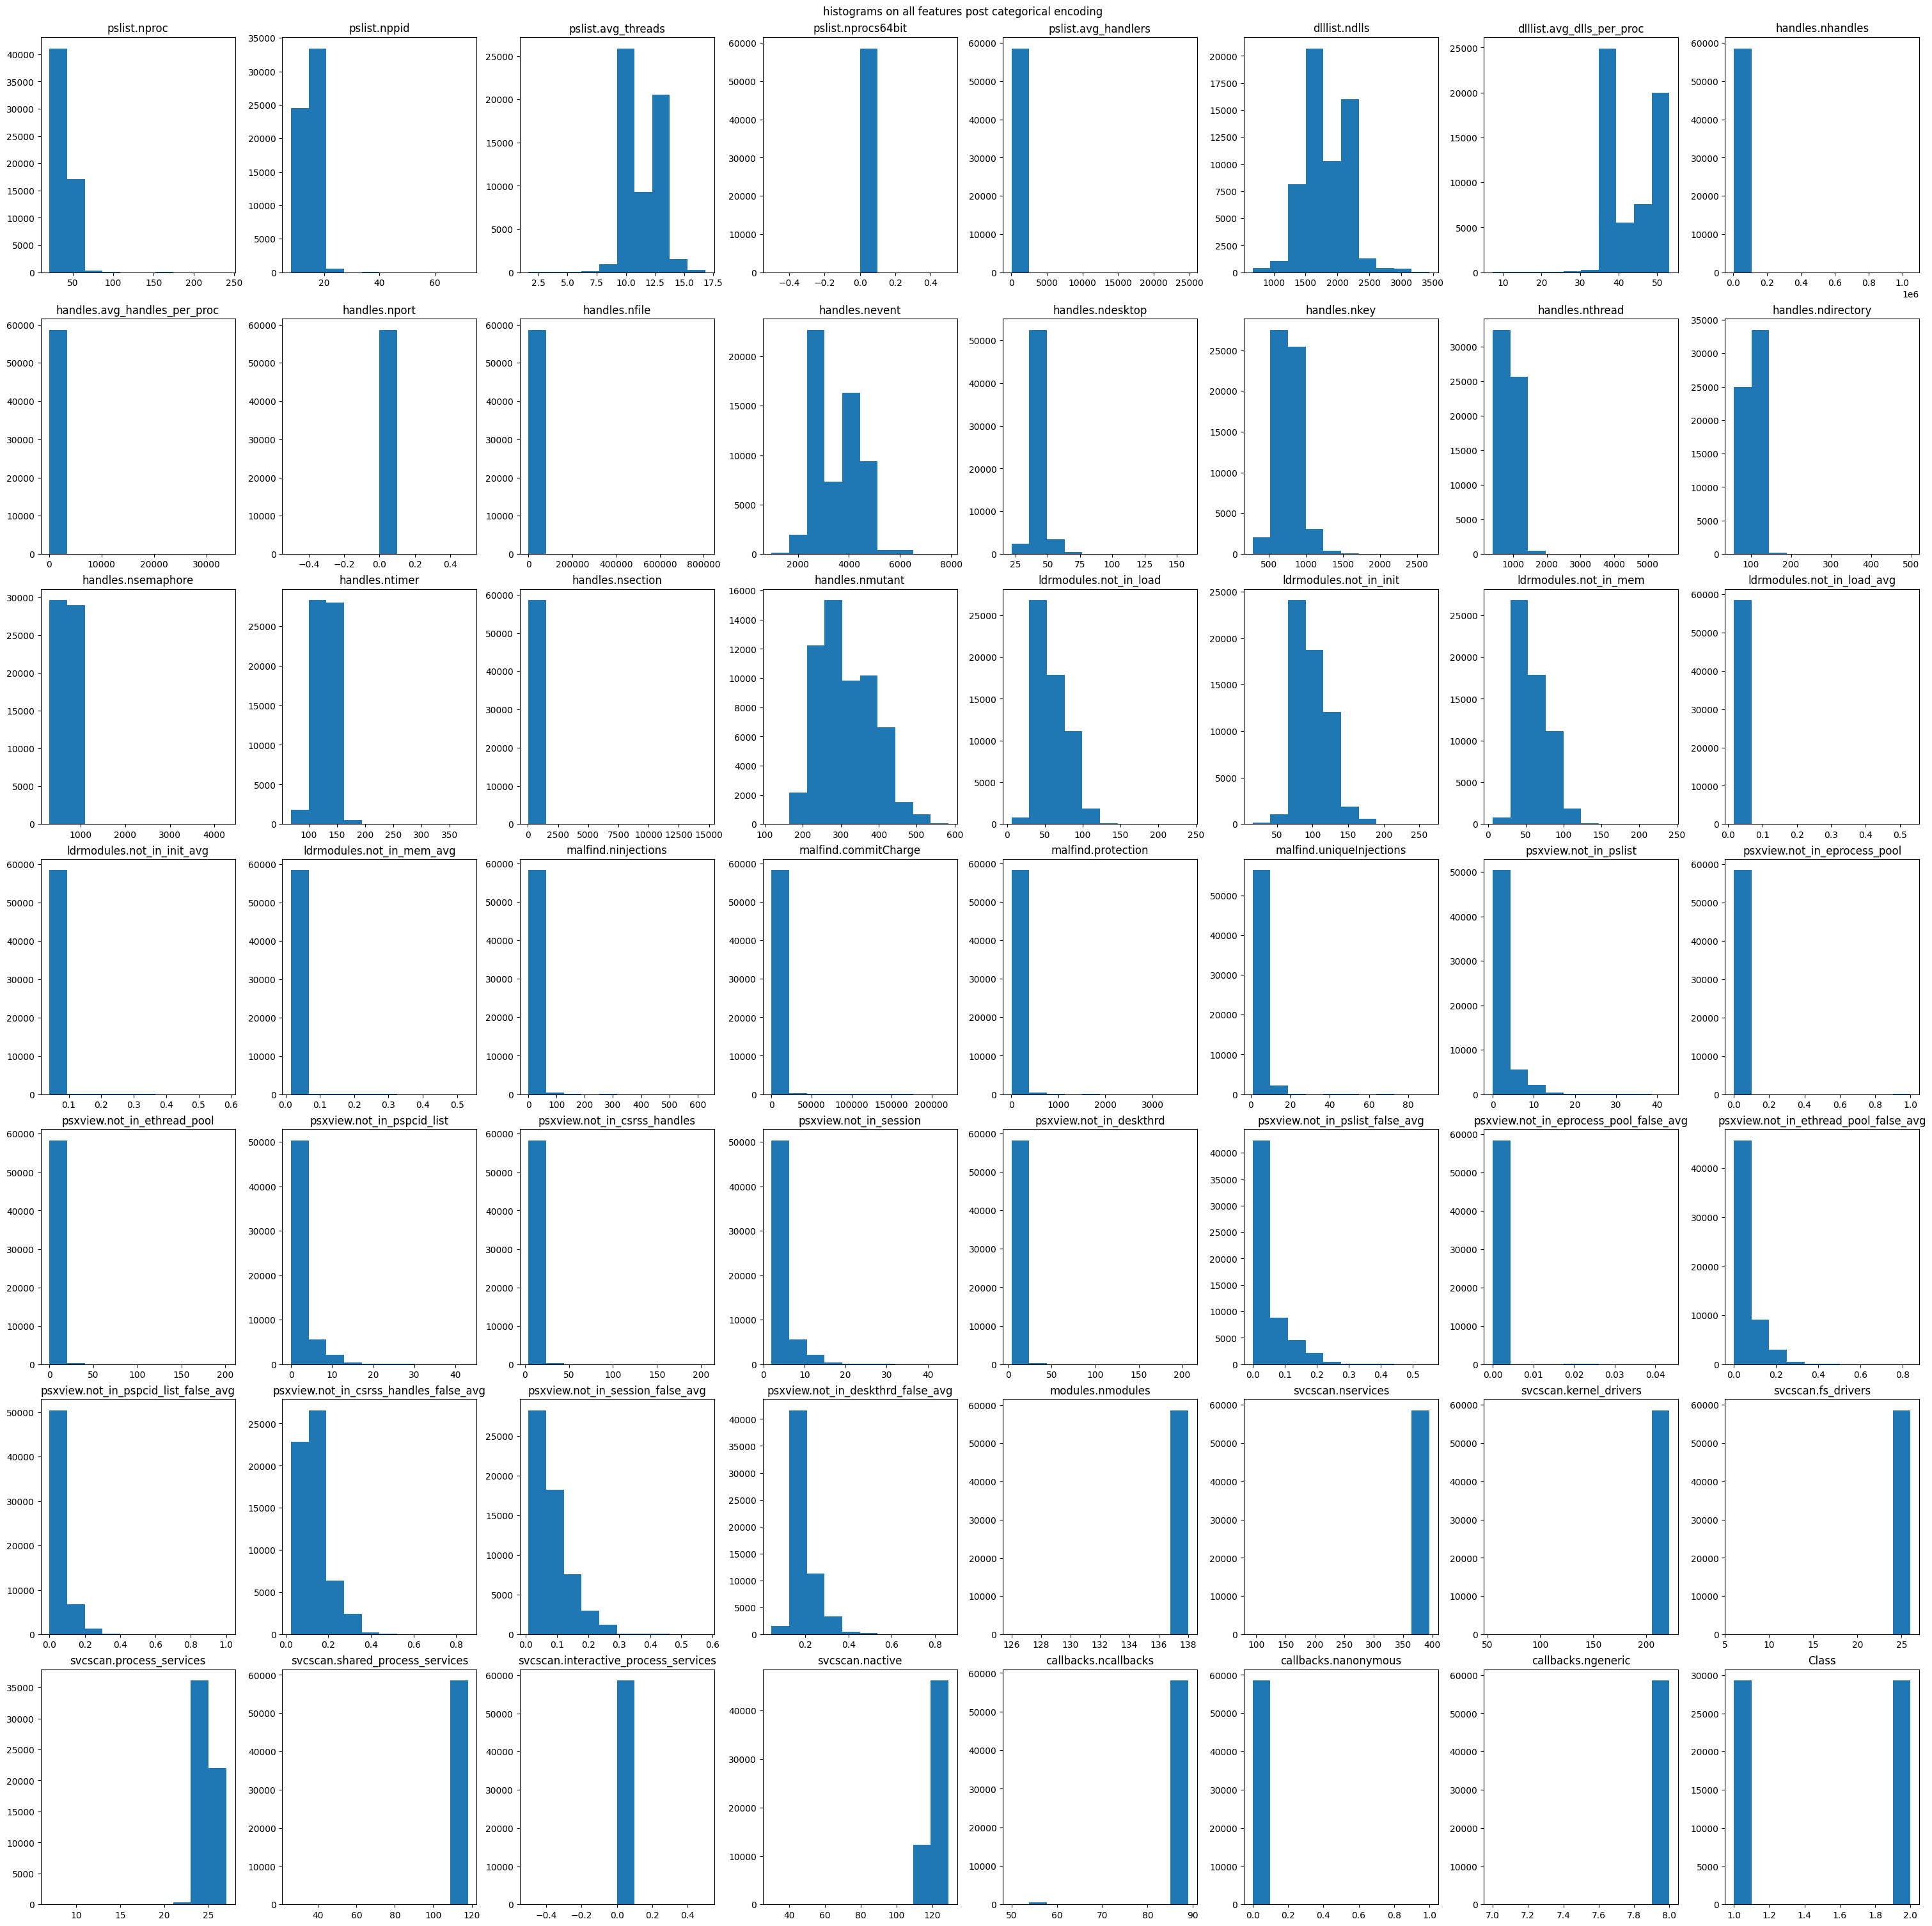

In [19]:
plt.figure(figsize=(30,30),constrained_layout=True)
plt.suptitle('histograms on all features post categorical encoding')
for i in range(df.columns.size):
    plt.subplot(int(df.columns.size/8),int(df.columns.size/7),i+1)
    plt.hist(dx[dx.columns[i]])
    plt.title(dx.columns[i])

In [20]:
norm=tf.keras.layers.Normalization()
norm.adapt(dx.drop(columns=dx.columns[temp],axis=1))
dx[dx.columns.delete(temp)]=norm(dx[dx.columns.delete(temp)]).numpy()

In [21]:
dx

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,0.624051,0.860520,-0.494954,0.0,-0.399307,-0.354190,-0.906961,-0.232101,-0.255201,0.0,...,-0.204152,0.021923,-0.695229,-0.567315,0.0,-0.352678,0.030098,-0.029224,0.011955,2
1,0.970240,1.613327,0.119799,0.0,-0.047164,0.798096,0.073134,0.231446,-0.050187,0.0,...,0.298092,0.021923,-0.695229,0.722712,0.0,0.001576,0.030098,-0.029224,0.011955,2
2,-0.241422,-0.268691,2.130287,0.0,0.363995,0.367505,0.799775,0.261034,0.264824,0.0,...,0.298092,0.021923,1.266049,0.722712,0.0,-0.706931,0.349172,-0.029224,0.011955,2
3,-1.626179,-0.645095,1.358980,0.0,0.149938,-1.109240,0.252270,-0.370178,0.100823,0.0,...,0.298092,0.021923,1.266049,0.722712,0.0,-0.706931,0.349172,-0.029224,0.011955,2
4,0.104767,0.484116,0.069722,0.0,0.302384,0.776870,0.959004,0.320005,0.217620,0.0,...,0.298092,0.021923,-0.695229,0.722712,0.0,0.710083,0.030098,-0.029224,0.011955,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,-0.760706,0.107713,-0.776683,0.0,-0.286287,-1.084981,-0.772813,-0.469627,-0.233391,0.0,...,-0.204152,0.021923,-0.695229,-0.567315,0.0,-0.706931,-0.288975,-0.029224,0.011955,1
58592,-0.760706,-0.268691,-0.878787,0.0,-0.512203,-1.406408,-1.271748,-0.661744,-0.406478,0.0,...,-0.204152,0.021923,-0.695229,-0.567315,0.0,-2.123945,0.349172,-0.029224,0.011955,1
58593,-0.587611,0.107713,-0.944169,0.0,-0.335101,-1.100143,-0.975707,-0.467778,-0.231725,0.0,...,-0.204152,0.021923,-0.695229,-0.567315,0.0,-0.706931,0.349172,-0.029224,0.011955,1
58594,-0.760706,0.107713,-0.691597,0.0,-0.286045,-1.088014,-0.777520,-0.469422,-0.233206,0.0,...,-0.204152,0.021923,-0.695229,-0.567315,0.0,-0.706931,0.030098,-0.029224,0.011955,1


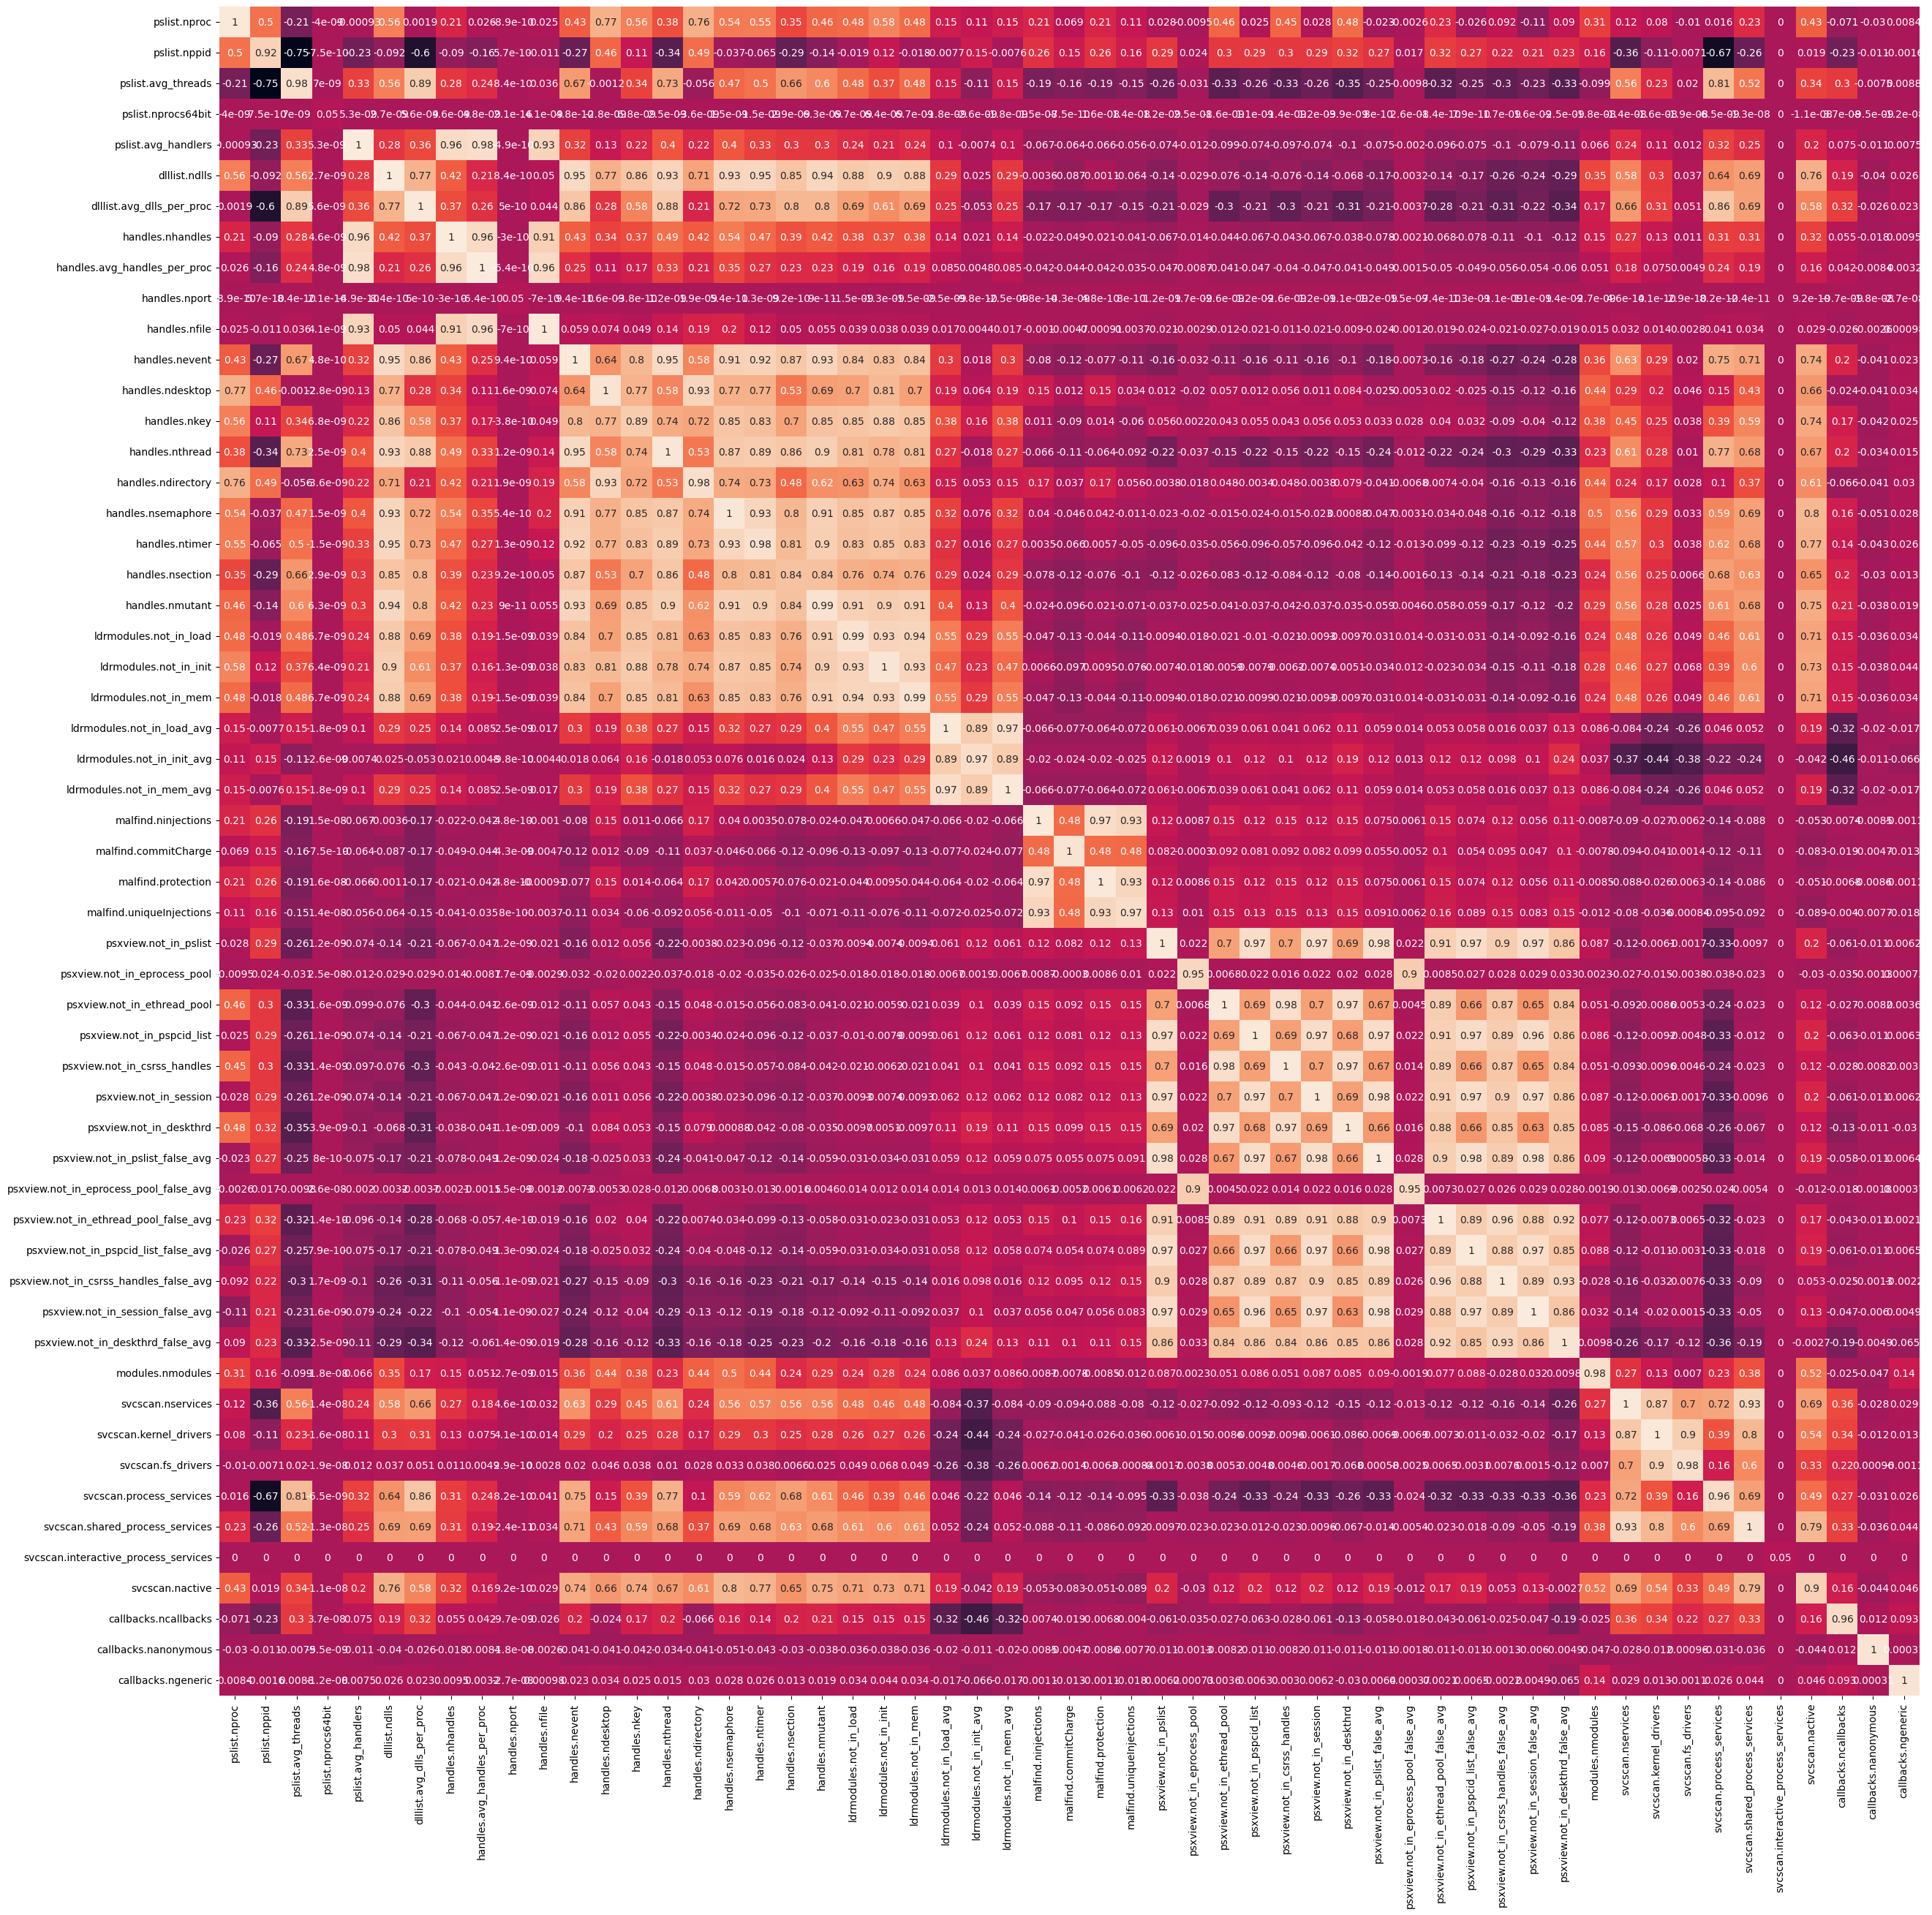

In [22]:
with parallel_backend('threading',n_jobs=-1):
    pc=PCA(n_components=14,random_state=170).fit(dx.drop(columns=dx.columns[temp],axis=1))
    plt.figure(figsize=(30,30))
    _=sns.heatmap(pc.get_covariance(),xticklabels=dx.columns.delete(temp),yticklabels=dx.columns.delete(temp),annot=True,cbar=False)

In [23]:
pc.explained_variance_ratio_.sum()

0.960309

In [24]:
def reshape_tf(input,dim_req):
    input=np.array(input)
    x=[]
    t=len(input.shape)
    for i in range(t-1):
        x.append(input.shape[i])
    for i in range(dim_req-t):
        x.append(1)
    x.append(input.shape[-1])
    return input.reshape(x)
def reshape_y7(y):    
    return tf.one_hot(y-1,len(dx['Class'].unique()))

In [25]:
len(dx['Class'].unique())

2

In [26]:
cols=dx.columns

model data gen

In [27]:
xtr,xte,ytr,yte=train_test_split(dx.drop(columns=['Class'],axis=1),dx['Class'],random_state=170,shuffle=True,stratify=dx['Class'])
xtr,valx,ytr,valy=train_test_split(xtr,ytr,test_size=0.1,random_state=170,stratify=ytr)
xtr.shape,xte.shape,ytr.shape,yte.shape

((39552, 55), (14649, 55), (39552,), (14649,))

for lstm models only

In [28]:
mxtr=reshape_tf(xtr,3)
mxte=reshape_tf(xte,3)
mytr=reshape_y7(ytr)
myte=reshape_y7(yte)
mvalx=reshape_tf(valx,3)
mvaly=reshape_y7(valy)

In [29]:
tf_batch_size=512

lstm

add hardmax layer after training tf models to get a single int instead of one hot encoded rep and to feed to stacked classifier after fit

In [30]:
lstmmodel=Sequential()
lstmmodel.add(tf.keras.layers.Input(shape=mxtr.shape[1:],batch_size=tf_batch_size))
lstmmodel.add(LSTM(units=mxtr.shape[1],return_sequences=True))
lstmmodel.add(LSTM(units=int(mxtr.shape[-1]/2),return_sequences=True))
# lstmmodel.add(Dropout(0.2,seed=170))
lstmmodel.add(LSTM(units=int(mxtr.shape[-1]/2),return_sequences=True))
lstmmodel.add(LSTM(units=int(mxtr.shape[-1]/4),return_sequences=False))
lstmmodel.add(Dense(units=len(dx['Class'].unique())))
lstmmodel.add(Softmax())
expdecay=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.002,
    decay_steps=int(mxtr.shape[0]/100),
    decay_rate=0.999,
    staircase=False,
)
early=tf.keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0,
    start_from_epoch=0,
    restore_best_weights=True,
    
)
lstmmodel.compile(
    optimizer=tf.optimizers.Adam(learning_rate=expdecay),
    loss=tf.losses.BinaryCrossentropy(),
    metrics=[
        tf.metrics.CategoricalAccuracy(),
        tf.metrics.Precision(),
        tf.metrics.Recall(),
    ],
)

In [31]:
mxtr.shape,mxte.shape

((39552, 1, 55), (14649, 1, 55))

In [32]:
lstmhistory=lstmmodel.fit(
    mxtr,
    mytr,
    batch_size=tf_batch_size,
    use_multiprocessing=True,
    workers=cores,
    epochs=200,
    callbacks=[early],
    validation_data=[mvalx,mvaly],
    validation_batch_size=tf_batch_size,
    shuffle=True,
    verbose=1,
)

Epoch 1/200
78/78 [==============================] - 18s 54ms/step - loss: 0.6349 - categorical_accuracy: 0.7547 - precision: 0.7547 - recall: 0.7547 - val_loss: 0.3970 - val_categorical_accuracy: 0.9176 - val_precision: 0.9176 - val_recall: 0.9176
Epoch 2/200
78/78 [==============================] - 1s 13ms/step - loss: 0.2401 - categorical_accuracy: 0.9325 - precision: 0.9325 - recall: 0.9325 - val_loss: 0.0821 - val_categorical_accuracy: 0.9868 - val_precision: 0.9868 - val_recall: 0.9868
Epoch 3/200
78/78 [==============================] - 1s 13ms/step - loss: 0.0374 - categorical_accuracy: 0.9941 - precision: 0.9941 - recall: 0.9941 - val_loss: 0.0161 - val_categorical_accuracy: 0.9977 - val_precision: 0.9977 - val_recall: 0.9977
Epoch 4/200
78/78 [==============================] - 1s 13ms/step - loss: 0.0179 - categorical_accuracy: 0.9971 - precision: 0.9971 - recall: 0.9971 - val_loss: 0.0109 - val_categorical_accuracy: 0.9982 - val_precision: 0.9982 - val_recall: 0.9982
Epoch 5

In [33]:
mytr[0:10]

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)>

In [34]:
lstmmodel.predict(mxte[0:10])

1/1 [==============================] - 3s 3s/step


array([[1.7258801e-10, 1.0000000e+00],
       [1.0000000e+00, 3.1709915e-09],
       [1.0000000e+00, 2.0101301e-09],
       [1.0000000e+00, 2.4677960e-09],
       [1.0000000e+00, 1.7358376e-09],
       [1.2964522e-09, 1.0000000e+00],
       [1.7712214e-10, 1.0000000e+00],
       [1.8549322e-10, 1.0000000e+00],
       [1.7914951e-10, 1.0000000e+00],
       [1.0000000e+00, 1.9896389e-09]], dtype=float32)

In [35]:
res=[]
res.append([
    lstmmodel.evaluate(
        mxtr,
        mytr,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1],
    lstmmodel.evaluate(
        mxte,
        myte,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1]
])

29/29 [==============================] - 0s 8ms/step - loss: 0.0018 - categorical_accuracy: 0.9997 - precision: 0.9997 - recall: 0.9997


tf nn

In [36]:
NNmodel=Sequential()
NNmodel.add(tf.keras.layers.Input(shape=dx.shape[1]-1,batch_size=1024))
NNmodel.add(Dense(units=dx.shape[1]))
NNmodel.add(Dense(units=dx.shape[1]*2))
NNmodel.add(Dropout(0.1,seed=170))
NNmodel.add(Dense(units=dx.shape[1]*2))
NNmodel.add(Dense(units=len(dx['Class'].unique())))
NNmodel.add(Softmax())
NNmodel.compile(
    optimizer=tf.optimizers.Adam(learning_rate=expdecay),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=[tf.metrics.CategoricalAccuracy(),tf.metrics.Precision(),tf.metrics.Recall()]
)

In [37]:
NNhistory=NNmodel.fit(
    xtr,
    mytr,
    use_multiprocessing=True,
    workers=cores,
    callbacks=[early],
    validation_data=[valx,mvaly],
    validation_batch_size=tf_batch_size,
    batch_size=tf_batch_size,
    epochs=200,
    shuffle=True,
    verbose=1,
)

Epoch 1/200
78/78 [==============================] - 4s 20ms/step - loss: 0.0522 - categorical_accuracy: 0.9834 - precision_1: 0.9834 - recall_1: 0.9834 - val_loss: 0.0044 - val_categorical_accuracy: 0.9982 - val_precision_1: 0.9982 - val_recall_1: 0.9982
Epoch 2/200
78/78 [==============================] - 1s 9ms/step - loss: 0.0064 - categorical_accuracy: 0.9982 - precision_1: 0.9982 - recall_1: 0.9982 - val_loss: 0.0038 - val_categorical_accuracy: 0.9989 - val_precision_1: 0.9989 - val_recall_1: 0.9989
Epoch 3/200
78/78 [==============================] - 1s 9ms/step - loss: 0.0051 - categorical_accuracy: 0.9985 - precision_1: 0.9985 - recall_1: 0.9985 - val_loss: 0.0046 - val_categorical_accuracy: 0.9989 - val_precision_1: 0.9989 - val_recall_1: 0.9989
Epoch 4/200
78/78 [==============================] - 1s 8ms/step - loss: 0.0045 - categorical_accuracy: 0.9987 - precision_1: 0.9987 - recall_1: 0.9987 - val_loss: 0.0039 - val_categorical_accuracy: 0.9986 - val_precision_1: 0.9986 - 

In [38]:
res.append([
    NNmodel.evaluate(
        xtr,
        mytr,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1],
    NNmodel.evaluate(
        xte,
        myte,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1]
])

29/29 [==============================] - 0s 5ms/step - loss: 0.0011 - categorical_accuracy: 0.9996 - precision_1: 0.9996 - recall_1: 0.9996


In [39]:
res

[[0.9996713399887085, 0.9997269511222839],
 [0.9995954632759094, 0.9995903968811035]]

argmax layer

In [40]:
class argmaxLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(argmaxLayer, self).__init__(**kwargs)
    def call(self, x):
        return tf.argmax(x, axis=-1)
argmax_tf = argmaxLayer()

In [41]:
NNmodel.layers,lstmmodel.layers

([<keras.src.layers.core.dense.Dense at 0x1e32ae53c10>,
  <keras.src.layers.activation.softmax.Softmax at 0x1e32ae03d60>])

In [42]:
NNmodel.add(argmax_tf)
lstmmodel.add(argmax_tf)
NNmodel.layers,lstmmodel.layers

([<keras.src.layers.core.dense.Dense at 0x1e32ae53c10>,
  <__main__.argmaxLayer at 0x1e331faccd0>])

In [43]:
NNmodel.predict(xte[:2]),lstmmodel.predict(mxte[:2])

1/1 [==============================] - 0s 42ms/step


(array([1, 0], dtype=int64),
 array([[1.7258801e-10, 1.0000000e+00],
        [1.0000000e+00, 3.1709915e-09]], dtype=float32))

In [44]:
def eval_sklearn_perf(model,yac=yte,xac=xte):
    ypr=model.predict(xac)
    return accuracy_score(yac,ypr)

sklearn models(svm,rf,km,knn,dt)

In [45]:
with parallel_backend('threading',n_jobs=-1):
    svm=SVC(random_state=170,kernel='rbf').fit(xtr,ytr)
    rf=RandomForestClassifier(max_depth=5,random_state=170,n_estimators=dx['Class'].unique().size,n_jobs=-1).fit(xtr,ytr)
    knn=KNeighborsClassifier(n_neighbors=1,n_jobs=-1).fit(xtr,ytr)
    dt=DecisionTreeClassifier(random_state=170,max_depth=10).fit(xtr,ytr)

In [46]:
l=[svm,rf,knn,dt]
with parallel_backend('threading',n_jobs=-1):
    for i in l:
        res.append([
            eval_sklearn_perf(i,yac=ytr,xac=xtr),
            eval_sklearn_perf(i),
        ])

xgboost

In [47]:
xgtr=xgb.DMatrix(xtr,label=(ytr-1))
xgte=xgb.DMatrix(xte,label=(yte-1))#-1 due to being 0 indexed
xgbost_model = xgb.train(
    params={
        'objective': 'multi:softmax',
        'num_class': dx['Class'].unique().size,
        'max_depth': 5,
        'eta': 0.01,
        'eval_metric': 'mlogloss'  
    },
    dtrain=xgtr,
    num_boost_round=100
)

In [48]:
res.append([
    eval_sklearn_perf(xgbost_model,yac=ytr-1,xac=xgtr),
    eval_sklearn_perf(xgbost_model,yac=yte-1,xac=xgte)
])

In [49]:
modList=[]
modList.append(lstmmodel)
modList.append(NNmodel)
modList.append(xgbost_model)
modList.append(knn)
modList.append(svm)
modList.append(rf)
modList.append(dt)

In [50]:
meta=Sequential()
meta.add(tf.keras.layers.Input(shape=[1,len(modList)],batch_size=tf_batch_size))
meta.add(LSTM(units=10))
meta.add(Dense(units=dx['Class'].unique().size))
meta.add(Softmax())
meta.compile(
    optimizer=tf.optimizers.Adam(learning_rate=expdecay),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=[
        tf.metrics.CategoricalAccuracy(),
        tf.metrics.Precision(),
        tf.metrics.Recall(),
    ]
)

In [51]:
def gen_op(data):
    mdata=reshape_tf(data,3)
    oplist=[]
    for i in range(len(modList)):
        print(f'running model{i},{modList[i]}')
        if i<1:
            oplist.append(argmax_tf(modList[i].predict(mdata,batch_size=tf_batch_size,workers=cores,use_multiprocessing=True)))#lstm
        elif i==1:
            oplist.append(modList[i].predict(data,batch_size=tf_batch_size,workers=cores,use_multiprocessing=True))#nn
        elif i==2:
            oplist.append(modList[i].predict(xgb.DMatrix(data))+1)#xgboost is 0 indexed
        else:
            with parallel_backend('threading',n_jobs=-1):
                oplist.append(modList[i].predict(data))#sklearn
        print(f'finsihed generating outputs')
    return np.array(oplist)

# stacked model

input dim:samples,1,no_of_models

input data generated from models(?generate and store vs generate at runtime)

validation data generated from models(?generate and store vs generate at runtime)

super sampling to adjust model to select results when inputs are conflicting(all models need to be established first) due to lack of such data vs data where inputs agree

hardmax to be used after training(done)

In [52]:
te_outputs=[]
te_outputs.append(
    gen_op(xte)
)

running model0,<keras.src.engine.sequential.Sequential object at 0x000001E32AE50AC0>
29/29 [==============================] - 0s 6ms/step
finsihed generating outputs
running model1,<keras.src.engine.sequential.Sequential object at 0x000001E32F3E0B20>
29/29 [==============================] - 0s 4ms/step
finsihed generating outputs
running model2,<xgboost.core.Booster object at 0x000001E3332B3B80>
finsihed generating outputs
running model3,KNeighborsClassifier(n_jobs=-1, n_neighbors=1)
finsihed generating outputs
running model4,SVC(random_state=170)
finsihed generating outputs
running model5,RandomForestClassifier(max_depth=5, n_estimators=2, n_jobs=-1, random_state=170)
finsihed generating outputs
running model6,DecisionTreeClassifier(max_depth=10, random_state=170)
finsihed generating outputs


In [53]:
tr_outputs=[]
tr_outputs.append(
    gen_op(xtr)
    )

running model0,<keras.src.engine.sequential.Sequential object at 0x000001E32AE50AC0>
78/78 [==============================] - 0s 5ms/step
finsihed generating outputs
running model1,<keras.src.engine.sequential.Sequential object at 0x000001E32F3E0B20>
78/78 [==============================] - 0s 4ms/step
finsihed generating outputs
running model2,<xgboost.core.Booster object at 0x000001E3332B3B80>
finsihed generating outputs
running model3,KNeighborsClassifier(n_jobs=-1, n_neighbors=1)
finsihed generating outputs
running model4,SVC(random_state=170)
finsihed generating outputs
running model5,RandomForestClassifier(max_depth=5, n_estimators=2, n_jobs=-1, random_state=170)
finsihed generating outputs
running model6,DecisionTreeClassifier(max_depth=10, random_state=170)
finsihed generating outputs


In [54]:
meta_tr=pd.DataFrame(tr_outputs[0]).T
meta_te=pd.DataFrame(te_outputs[0]).T
meta_tr

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,2.0,2.0,2.0,2.0,2.0
4,1.0,1.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...
39547,1.0,1.0,2.0,2.0,2.0,2.0,2.0
39548,1.0,1.0,2.0,2.0,2.0,2.0,2.0
39549,1.0,1.0,2.0,2.0,2.0,2.0,2.0
39550,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [55]:
meta_callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=15,restore_best_weights=True)
metahis=meta.fit(
    np.array(np.array(meta_tr).reshape(xtr.shape[0],1,len(modList))),
    mytr,
    batch_size=tf_batch_size,
    use_multiprocessing=True,
    workers=cores,
    epochs=200,
    callbacks=[meta_callback],
    verbose=1,
)

Epoch 1/200
78/78 [==============================] - 5s 6ms/step - loss: 0.5254 - categorical_accuracy: 0.7478 - precision_2: 0.7478 - recall_2: 0.7478
Epoch 2/200
78/78 [==============================] - 0s 5ms/step - loss: 0.1973 - categorical_accuracy: 0.9997 - precision_2: 0.9997 - recall_2: 0.9997
Epoch 3/200
78/78 [==============================] - 0s 5ms/step - loss: 0.0628 - categorical_accuracy: 0.9997 - precision_2: 0.9997 - recall_2: 0.9997
Epoch 4/200
78/78 [==============================] - 0s 5ms/step - loss: 0.0288 - categorical_accuracy: 0.9997 - precision_2: 0.9997 - recall_2: 0.9997
Epoch 5/200
78/78 [==============================] - 0s 5ms/step - loss: 0.0168 - categorical_accuracy: 0.9997 - precision_2: 0.9997 - recall_2: 0.9997
Epoch 6/200
78/78 [==============================] - 0s 6ms/step - loss: 0.0112 - categorical_accuracy: 0.9997 - precision_2: 0.9997 - recall_2: 0.9997
Epoch 7/200
78/78 [==============================] - 0s 5ms/step - loss: 0.0081 - catego

In [56]:
meta.layers

In [57]:
np.array(meta_te).reshape(meta_te.shape[0],1,len(modList)).shape

(14649, 1, 7)

In [58]:
res.append([
    meta.evaluate(
        np.array(meta_tr).reshape(meta_tr.shape[0],1,len(modList)),
        mytr,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1],
    meta.evaluate(
        np.array(meta_te).reshape(meta_te.shape[0],1,len(modList)),
        myte,
        batch_size=tf_batch_size,
        use_multiprocessing=True,
        workers=cores,
    )[1]
])

29/29 [==============================] - 0s 5ms/step - loss: 1.7071e-05 - categorical_accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000


In [59]:
meta.add(argmax_tf)

In [60]:
meta.predict(np.array(meta_te).reshape(meta_te.shape[0],1,len(modList))[:10])

1/1 [==============================] - 1s 780ms/step


array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

# voting classifier

In [61]:
def votingClassifier(data,axis=0,):
    return scipy.stats.mode(data,axis=axis).mode

In [62]:
res.append([
    accuracy_score(ytr,votingClassifier(meta_tr,1).reshape(meta_tr.shape[0])),
    accuracy_score(yte,votingClassifier(meta_te,1).reshape(meta_te.shape[0]))
])

C:\Users\Dell\AppData\Local\Temp\ipykernel_14744\1480873025.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(data,axis=axis).mode


C:\Users\Dell\AppData\Local\Temp\ipykernel_14744\1480873025.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(data,axis=axis).mode


# results

In [63]:
pd.DataFrame(
    res,
    columns=['train','test'],
    index=['lstm','nueral network','support vector machine','random forest','1-nearest-neighbour','decision tree','xgboost','meta lstm','Voting'],
    )

,train,test
lstm,0.999671,0.999727
nueral network,0.999595,0.999590
support vector machine,0.999368,0.999113
random forest,0.999039,0.998635
1-nearest-neighbour,1.000000,0.999863
decision tree,1.000000,0.999727
xgboost,0.999772,0.999386
meta lstm,1.000000,1.000000
Voting,0.999823,0.999522


#intensity/rates in poisson modeld(fish found per unit area)

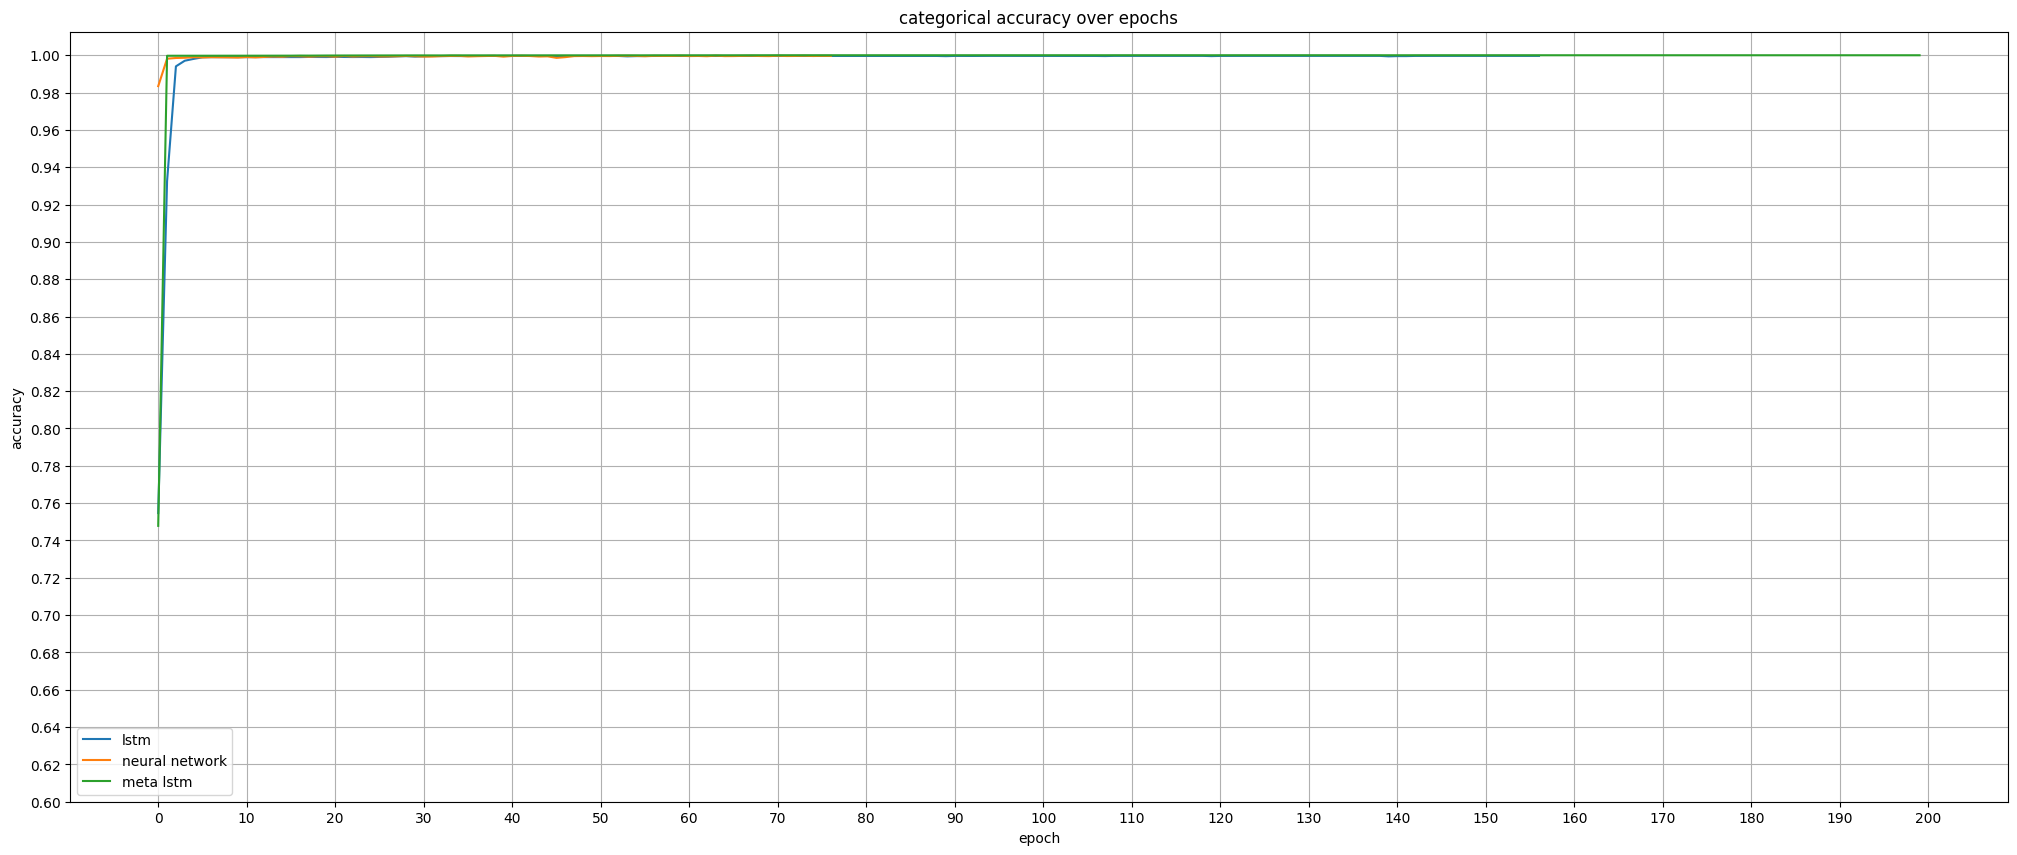

In [64]:
plt.figure(figsize=(25,10))
plt.title('categorical accuracy over epochs')
plt.plot(lstmhistory.history['categorical_accuracy'],label='lstm')
plt.plot(NNhistory.history['categorical_accuracy'],label='neural network')
plt.plot(metahis.history['categorical_accuracy'],label='meta lstm')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.yticks(ticks=np.arange(0.6,1.01,0.02))
plt.xticks(ticks=np.arange(0,201,10))
plt.legend()
plt.grid(True)

In [66]:
end=datetime.now()
f'time taken for notebook execution: {(end-start).seconds}s'

'time taken for notebook execution: 427s'